In [52]:
install.packages("extraDistr")
install.packages("MASS")


The downloaded binary packages are in
	/var/folders/bx/vr1n7w6x7053h6fbl2jrprwm0000gn/T//Rtmp98Eymf/downloaded_packages

The downloaded binary packages are in
	/var/folders/bx/vr1n7w6x7053h6fbl2jrprwm0000gn/T//Rtmp98Eymf/downloaded_packages


In [53]:
library(extraDistr)
library(MASS)

Warning message:
“package ‘MASS’ was built under R version 4.1.2”


# 1.11 Exercises

**Exercise 1.1** Practice using the $pnorm$ function - Part 1

Given a normal distribution with mean 500 and standard deviation 100, use the pnorm function to calculate the probability of obtaining values between 200 and 800 from this distribution.

In [2]:
pnorm(800, 500, 100) - pnorm(200, 500, 100)

[1] 0.9973002

**Exercise 1.2** Practice using the $pnorm$ function - Part 2

Calculate the following probabilities. Given a normal distribution with mean 800 and standard deviation 150, what is the probability of obtaining:

- a score of 700 or less
- a score of 900 or more
- a score of 800 or more

In [6]:
# 700 or less
pnorm(700, 800, 150)

# 900 or more
pnorm(900, 800, 150, lower.tail = FALSE)

# 800 or more
pnorm(800, 800, 150, lower.tail = FALSE)

[1] 0.2524925

[1] 0.2524925

[1] 0.5

**Exercise 1.3** Practice using the $pnorm$ function - Part 3

Given a normal distribution with mean 600 and standard deviation 200, what is the probability of obtaining:

- a score of 550 or less.
- a score between 300 and 800.
- a score of 900 or more.

In [7]:
# 550 or less
pnorm(550, 600, 200)

# between 300 and 800
pnorm(800, 600, 200) - pnorm(300, 600, 200)

# 900 or more
pnorm(900, 600, 200, lower.tail = FALSE)

[1] 0.4012937

[1] 0.7745375

[1] 0.0668072

**Exercise 1.4** Practice using the $qnorm$ function - Part 1


Consider a normal distribution with mean 1 and standard deviation 1. Compute the lower and upper boundaries such that:

- the area (the probability) to the left of the lower boundary is 0.10.
- the area (the probability) to the left of the upper boundary is 0.90.

In [10]:
qnorm(0.1, 1, 1)

qnorm(0.9, 1, 1)

[1] -0.2815516

[1] 2.281552

**Exercise 1.5** Practice using the qnorm function - Part 2

Given a normal distribution with mean 650 and standard deviation 125. There exist two quantiles, the lower quantile q1 and the upper quantile q2, that are equidistant from the mean 650, such that the area under the curve of the normal between q1 and q2 is 80%. Find q1 and q2.

In [15]:
# p(q2) - p(q1) = 80% & qs equidistant from the mean 650

q1 = qnorm(0.1, 650, 125)
q2 = qnorm(0.9, 650, 125)

q1
q2

[1] 489.8061

[1] 810.1939

In [18]:
y <- rnorm(1000, 650, 125)
quantile(y, probs=c(0.1, 0.9))

10%      90% 
482.7125 815.3736

**Exercise 1.6** Practice getting summaries from samples - Part 1

Given data that is generated as follows:

In [20]:
data_gen1 <- rnorm(1000, 300, 200)

Calculate the mean, variance, and the lower quantile q1 and the upper quantile q2, that are equidistant and such that the range of probability between them is 80%.

In [30]:
# mean
m = mean(data_gen1)
m

# std
sd = sd(data_gen1)
sd

# quantiles
quantile(data_gen1, probs=c(0.1, 0.9))

[1] 319.3293

[1] 169.6211

10%      90% 
100.3165 532.5406

**Exercise 1.7** Practice getting summaries from samples - Part 2.

This time we generate the data with a truncated normal distribution from the package extraDistr. The details of this distribution will be discussed later in 4.1 and in the Box 4.1, but for now we can treat it as an unknown generative process:

In [40]:
data_gen1 <- rtnorm(1000, 300, 200, a = 0)

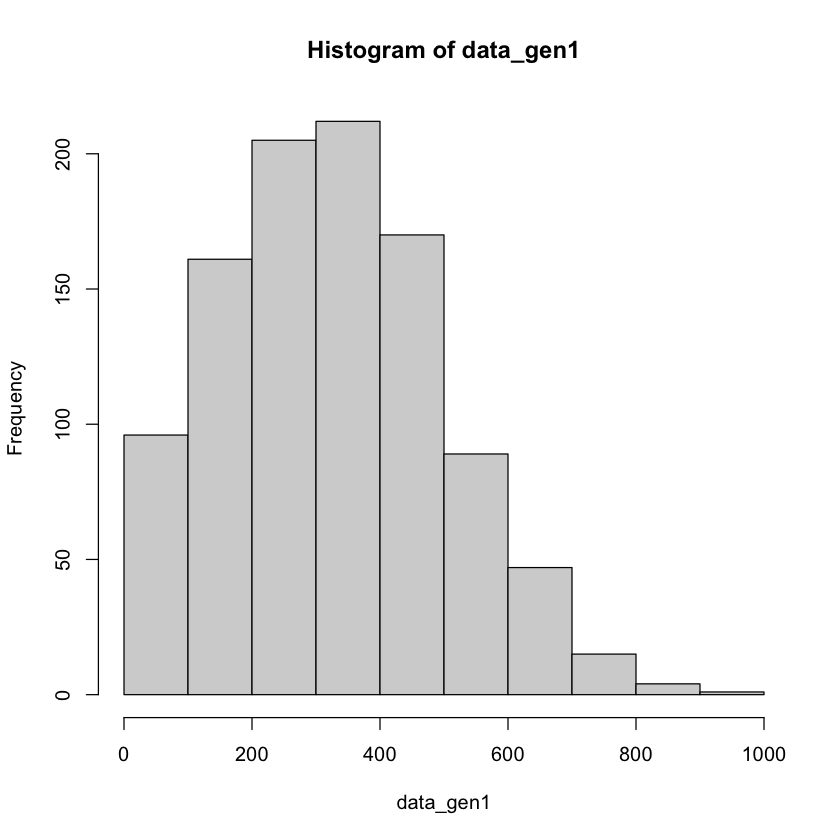

In [41]:
hist(data_gen1)

Calculate the mean, variance, and the lower quantile q1 and the upper quantile q2, that are equidistant and such that the range of probability between them is 80%.

In [42]:
# mean
m = mean(data_gen1)
m

# std
sd = sd(data_gen1)
sd

# quantiles
quantile(data_gen1, probs=c(0.1, 0.9))

[1] 326.5469

[1] 171.6136

10%      90% 
102.4387 557.2698

**Exercise 1.8** Practice with a variance-covariance matrix for a bivariate distribution.

Suppose that you have a bivariate distribution where one of the two random variables comes from a normal distribution with mean $μ_{X} = 600$ and standard deviation $σ_{X} = 100$, and the other from a normal distribution with mean $μ_{Y} = 400$ and standard deviation $σ_{Y} = 50$. The correlation $ρ_{XY}$ between the two random variables is $0.4$. Write down the variance-covariance matrix of this bivariate distribution as a matrix (with numerical values, not mathematical symbols), and then use it to generate $100$ pairs of simulated data points. Plot the simulated data such that the relationship between the random variables $X$ and $Y$ is clear. Generate two sets of new data ($100$ pairs of data points each) with correlation $-0.4$ and $0$, and plot these alongside the plot for the data with correlation $0.4$.

In [78]:
# sds
sds <- c(100, 50)

# as diagonal
sd_diag <- diag(sds)
sd_diag

100,0
0,50


In [79]:
# correlation matrix
corrmatrix <- matrix(c(1, 0.4, 0.4, 1), ncol = 2)
corrmatrix

1.0,0.4
0.4,1.0


In [80]:
# variance-covariance matrix
var_covar_matrix = sd_diag %*% corrmatrix %*% sd_diag
var_covar_matrix

10000,2000
2000,2500


In [87]:
# generate data
data <- mvrnorm(
  n = 100,
  mu = c(600, 400),
  Sigma = var_covar_matrix
)

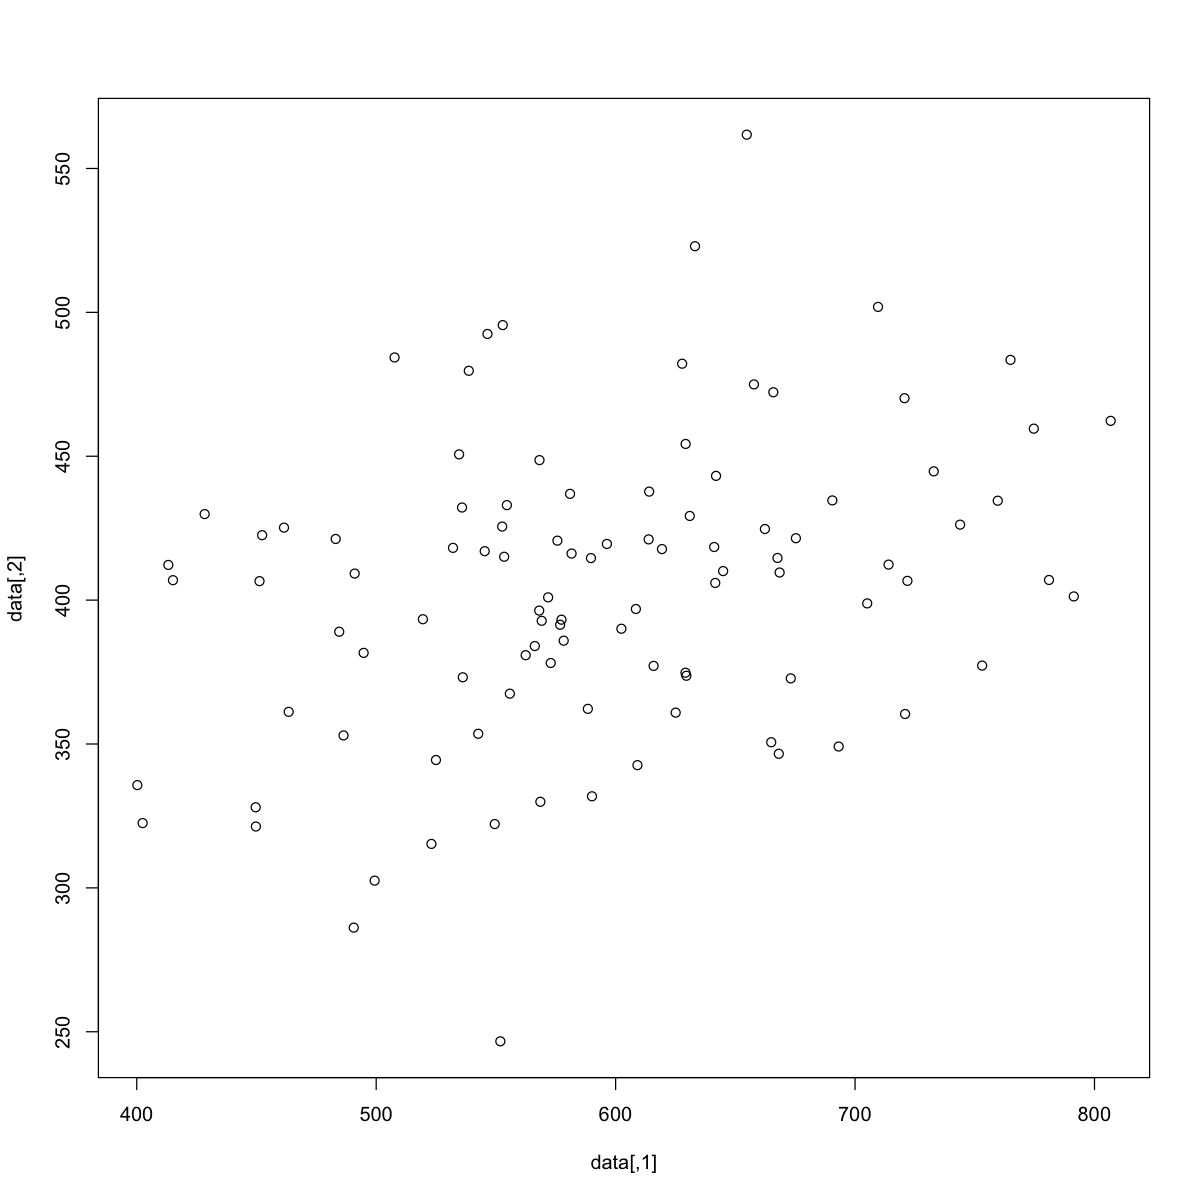

In [88]:
plot(data)

In [61]:
# generate data with correlation -0.4

# correlation matrix
corrmatrix_2 <- matrix(c(1, -0.4, -0.4, 1), ncol = 2)
corrmatrix_2

# variance-covariance matrix
var_covar_matrix_2 = sd_diag %*% corrmatrix_2 %*% sd_diag
var_covar_matrix_2

# generate data
data_2 <- mvrnorm(
  n = 100,
  mu = c(600, 400),
  Sigma = var_covar_matrix_2
)

1.0,-0.4
-0.4,1.0


10000,-2000
-2000,2500


In [62]:
# generate data with correlation 0

# correlation matrix
corrmatrix_3 <- matrix(c(1, 0, 0, 1), ncol = 2)
corrmatrix_3

# variance-covariance matrix
var_covar_matrix_3 = sd_diag %*% corrmatrix_3 %*% sd_diag
var_covar_matrix_3

# generate data
data_3 <- mvrnorm(
  n = 100,
  mu = c(600, 400),
  Sigma = var_covar_matrix_3
)

1,0
0,1


10000,0
0,2500


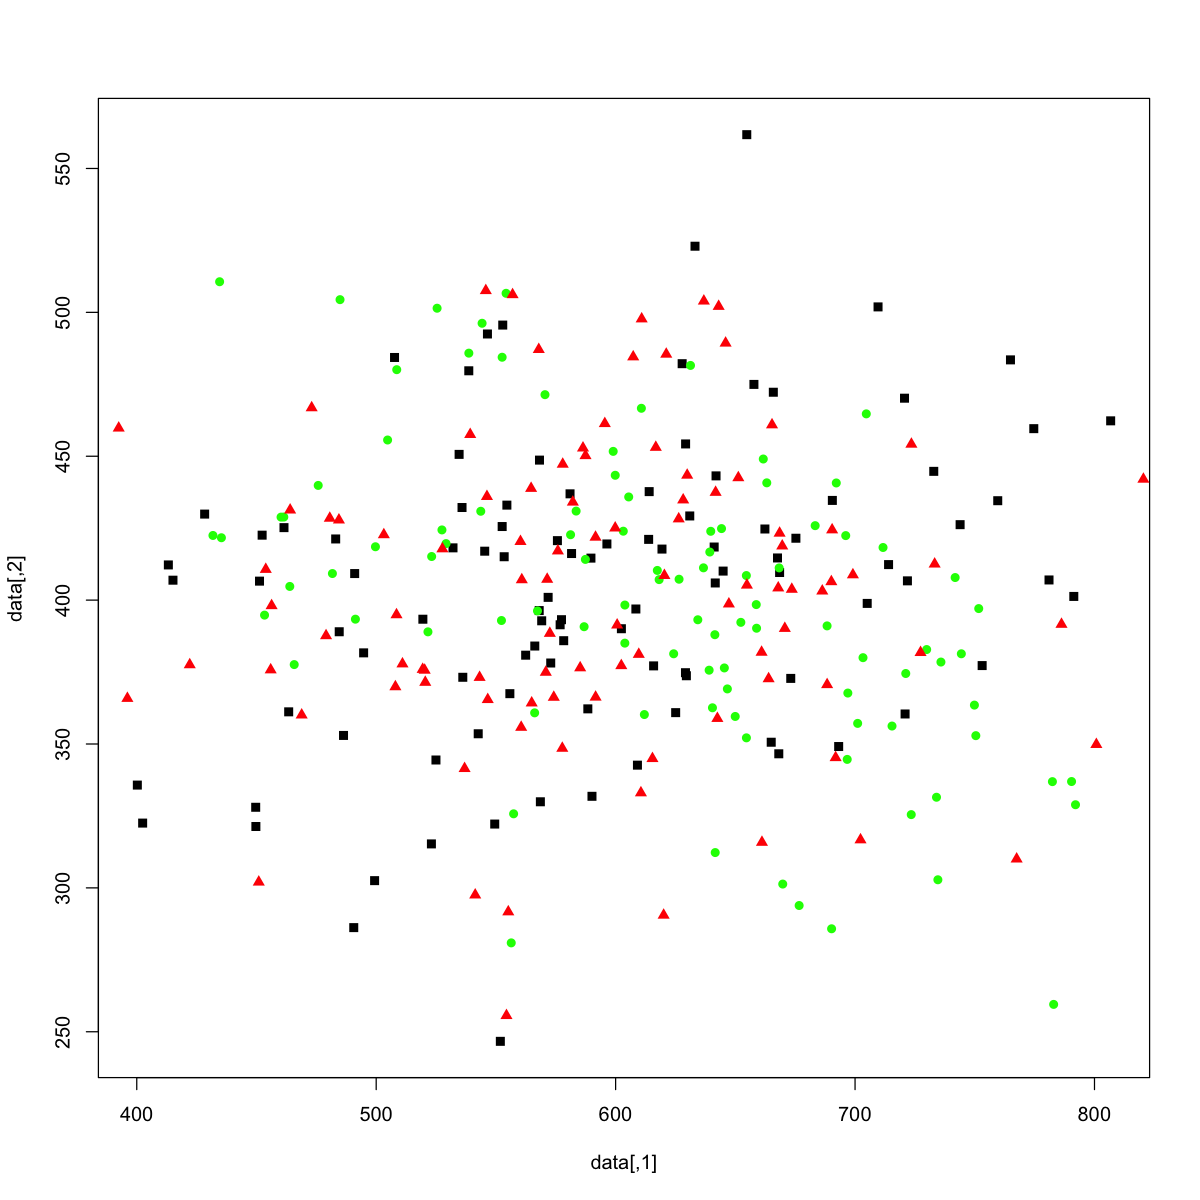

In [89]:
options(repr.plot.width=10, repr.plot.height=10)
plot(data, pch = 15)
points(data_2, col = "green", pch = 16)
points(data_3, col = "red", pch = 17)